<div style="text-align: center;">
<img src="https://assets-global.website-files.com/62b9d45fb3f64842a96c9686/62d84db4aeb2f6552f3a2f78_Quantinuum%20Logo__horizontal%20blue.svg" width="200" height="200" /></div>

# Second notebook for ALPS I Hands-on session

## Building Hamiltonian simulation circuits using Pauli operators

We have seen in the lecture that we can consider the task of Quantum (or Hamiltonian) simulation as the realization of the unitary operator

$$
U(t) = e^{- i t \hat{H}}
$$

seen as a quantum circuit.

Consider a general Hamiltonian $\hat{H} = \sum_j \hat{H}_j$ where we now pick a single term and consider it as a tensor product of Pauli operators on the qubits

Pick as example $\hat{H}_0 = X \otimes Y \otimes Z$ and build a circuit for it in `pytket`

In [1]:
from pytket.pauli import Pauli, QubitPauliString
from pytket.utils import QubitPauliOperator
from pytket.circuit import Qubit

H0 = QubitPauliOperator(
    {QubitPauliString([Qubit(0), Qubit(1), Qubit(2)], [Pauli.X, Pauli.Y, Pauli.Z]): 1.0}
)

In [2]:
H0

{(Xq[0], Yq[1], Zq[2]): 1.00000000000000}

In [3]:
num_qubits = len(H0.all_qubits)

This operator is a 8x8 matrix!

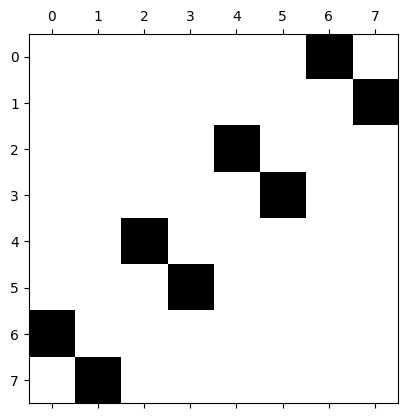

In [8]:
from matplotlib import pyplot as plt 
plt.spy(H0.to_sparse_matrix().todense())

In [5]:
hm = H0.to_sparse_matrix(num_qubits).todense()
hm.imag

matrix([[ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  0.],
        [ 0.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., -1.,  0.,  0.,  0.,  0.,  0.,  0.]])

Having access to the matrix (and the fact that it is rather small) lets us compute the exponential exactly (numerically)!

In [6]:
from scipy.linalg import expm

# Compute the matrix exponential of the Hamiltonian for t=1.0
exp_hm = expm(-1j * hm * 1.0)
exp_hm

array([[ 0.54030231+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
        -0.84147098+0.j,  0.        +0.j],
       [ 0.        +0.j,  0.54030231+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.84147098+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.54030231+0.j,
         0.        +0.j,  0.84147098+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.54030231+0.j,  0.        +0.j, -0.84147098+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j, -0.84147098+0.j,
         0.        +0.j,  0.54030231+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.84147098+0.j,  0.        +0.j,  0.54030231+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.84147098+0.j,  0.      

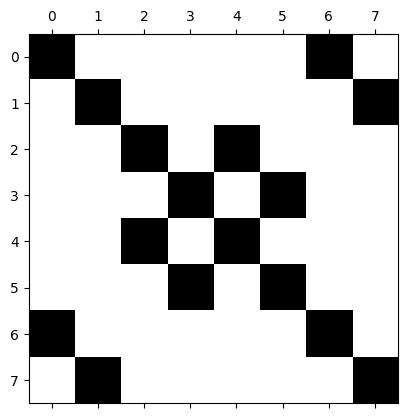

In [7]:
plt.spy(exp_hm)

### Introducing `PauliExpBox`

This approach will not work for large matrices that do not fit in memory. On the other hand, we can use the properties of exponentials of Pauli operators to create quantum circuits as we saw in the lectures.

`pytket` has several features that can help with this. We start by looking at a new circuit _box_ that will contain the circuit representation of

$$
e^{-i t \frac{\pi}{2} \sigma_0 \otimes \sigma_1 \otimes \cdots}
$$

which is called `PauliExpBox` and where `t` is a parameter

In [13]:
H0

{(Xq[0], Yq[1], Zq[2]): 1.00000000000000}

In [17]:
from pytket.circuit import PauliExpBox
from math import pi

H0_box = PauliExpBox([Pauli.X, Pauli.Y, Pauli.Z], 2.0/pi)

In [18]:
from pytket.circuit import Circuit
# add a box to a circuit
pauli_circ = Circuit(num_qubits, name="Pauli exponential")
pauli_circ.add_pauliexpbox(H0_box, [0, 1, 2])

[PauliExpBox q[0], q[1], q[2]; ]

In [19]:
from pytket.circuit.display import render_circuit_jupyter as draw

draw(pauli_circ)

In [20]:
pauli_circ.get_unitary()

array([[ 0.54030231+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
        -0.84147098+0.j,  0.        +0.j],
       [ 0.        +0.j,  0.54030231+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.84147098+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.54030231+0.j,
         0.        +0.j,  0.84147098+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.54030231+0.j,  0.        +0.j, -0.84147098+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j, -0.84147098+0.j,
         0.        +0.j,  0.54030231+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.84147098+0.j,  0.        +0.j,  0.54030231+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.84147098+0.j,  0.      

We can check that the unitary represented by the circuit above is exactly the same as the matrix we obtained from exponentiating the Hamiltonian:

In [21]:
import numpy as np

np.allclose(pauli_circ.get_unitary(), exp_hm)

True

### Decomposing `PauliExpBox`

Every _box_ in the circuit can be *decomposed* into a set of predefined gates using hard-coded rules. Here we decompose our circuit for unitary time evolution

In [22]:
from pytket.passes import DecomposeBoxes

decomposed_circ = pauli_circ.copy()
DecomposeBoxes().apply(decomposed_circ)

True

In [23]:
draw(decomposed_circ)

## Running circuits in `pytket`

`pytket` can give you the statevector and the unitary matrix of small circuits, but this feature becomes exponentially more costly with the increasing number of qubits.
Moreover, statevector and unitary matrices are not what you get as output from quantum computers.